## Practical Work 2

implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import math
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
#tells Matplotlib to render the plots as static images within the notebook.
%matplotlib inline   

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [66]:
a = -2     # slope
b = 1      # intercept

x = np.linspace(0,20,50)
print(f"x values : " , x)
print("*"*80)
y = a*x + b 
print(f"y values : " , y)

x values :  [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
********************************************************************************
y values :  [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.1428

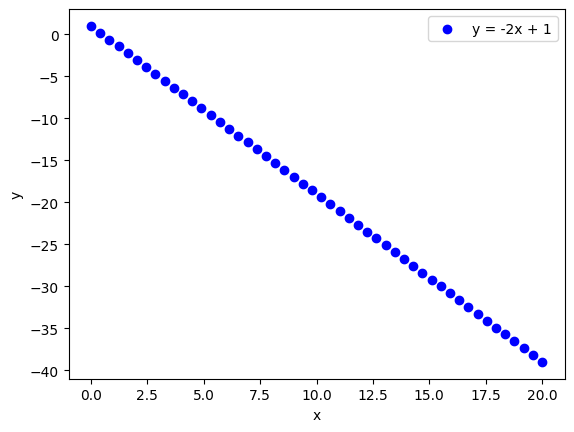

In [3]:
plt.scatter(x,y,label='y = -2x + 1',color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def gradient_descent(X, y, alpha=0.01, iterations=1000, convergence_rate=0.001):
    m = len(y)
    theta_0 = 0  
    theta_1 = 0  
    report = []
    losses = [] 
    theta_0_history = []
    theta_1_history = []

    for i in range(iterations): 
        y_predicted = theta_0 + (theta_1 * X)  
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)  
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        theta_0 = theta_0 - alpha * gradient_theta_0  
        theta_1 = theta_1 - alpha * gradient_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted
        })
        
        if abs(gradient_theta_0) < convergence_rate and abs(gradient_theta_1) < convergence_rate:
            print(f"Converged at iteration {i+1}")
            break
    
    return report,losses,theta_0_history,theta_1_history


#### Try your function with any input parameterss of your choice.

In [5]:
report,losses,theta_0_history,theta_1_history = gradient_descent(x, y,iterations=200, alpha=0.0001)

In [6]:
df = pd.DataFrame(report)
df.head()

Iteration   Theta_0   Theta_1        Loss  Gradient_Theta_0  \
0          1 -0.001900 -0.025939  249.887755         19.000000   
1          2 -0.003774 -0.051526  243.169261         18.738712   
2          3 -0.005622 -0.076767  236.631522         18.480963   
3          4 -0.007445 -0.101666  230.269675         18.226706   
4          5 -0.009242 -0.126228  224.078988         17.975891   

   Gradient_Theta_1                                         Hypothesis  
0        259.387755  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1        255.874961  [-0.0019, -0.012487255310287382, -0.0230745106...  
2        252.409743  [-0.003773871224489796, -0.024805002487823954,...  
3        248.991457  [-0.0056219675657721785, -0.03695553732187759,...  
4        245.619468  [-0.007444638123113143, -0.04894112450807032, ...

In [7]:
# To access the final values of theta_0 and theta_1
print(f"Final theta_0 value: {report[-1]['Theta_0']}")
print(f"Final theta_1 value: {report[-1]['Theta_1']}")

Final theta_0 value: -0.12729283174377362
Final theta_1 value: -1.7902163139341107


#### Calculate r2 score

In [8]:
y_predicted =  report[-1]['Hypothesis']

In [9]:
from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9817843965892691 so we have accuracy of 98.18 %


#### Plot loss vs. epochs

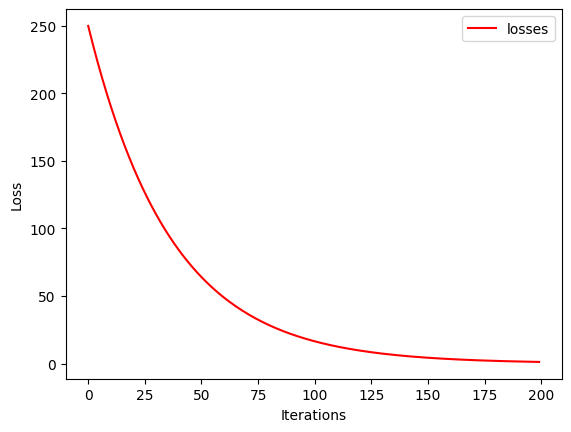

In [10]:
plt.plot( losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

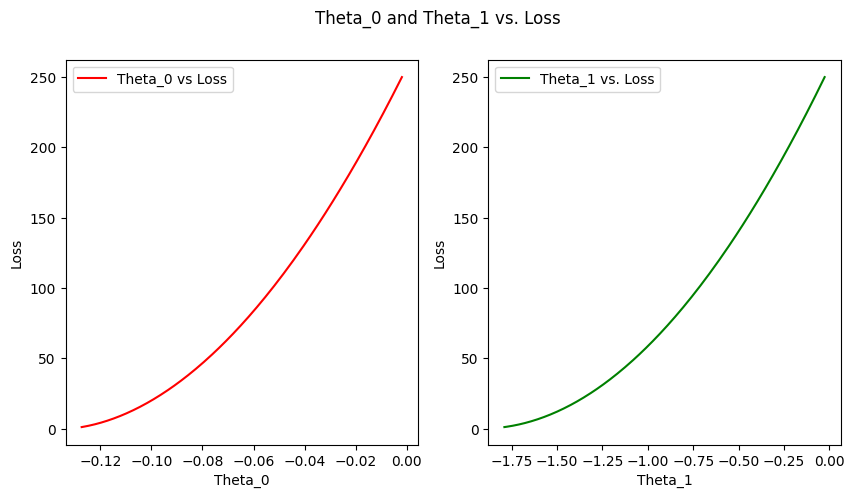

In [11]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plot all regression lines till converge

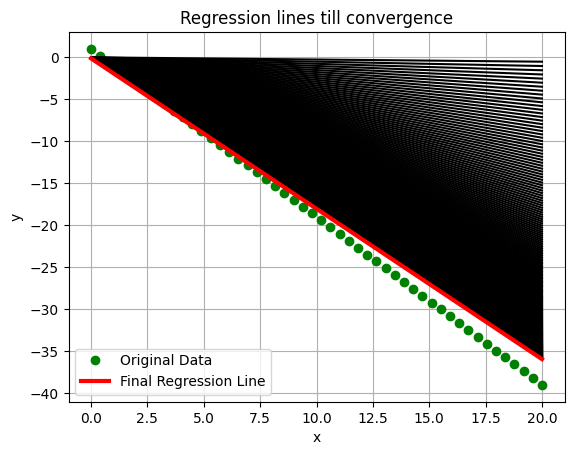

In [12]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


#### Plot the best regression line

In [13]:
final_line_y_pred = report[-1]['Hypothesis']    
final_line_y_pred

array([ -0.12719405,  -0.85719187,  -1.58718969,  -2.31718751,
        -3.04718533,  -3.77718315,  -4.50718097,  -5.23717879,
        -5.96717661,  -6.69717443,  -7.42717225,  -8.15717007,
        -8.88716789,  -9.61716571, -10.34716353, -11.07716136,
       -11.80715918, -12.537157  , -13.26715482, -13.99715264,
       -14.72715046, -15.45714828, -16.1871461 , -16.91714392,
       -17.64714174, -18.37713956, -19.10713738, -19.8371352 ,
       -20.56713302, -21.29713084, -22.02712866, -22.75712649,
       -23.48712431, -24.21712213, -24.94711995, -25.67711777,
       -26.40711559, -27.13711341, -27.86711123, -28.59710905,
       -29.32710687, -30.05710469, -30.78710251, -31.51710033,
       -32.24709815, -32.97709597, -33.70709379, -34.43709162,
       -35.16708944, -35.89708726])

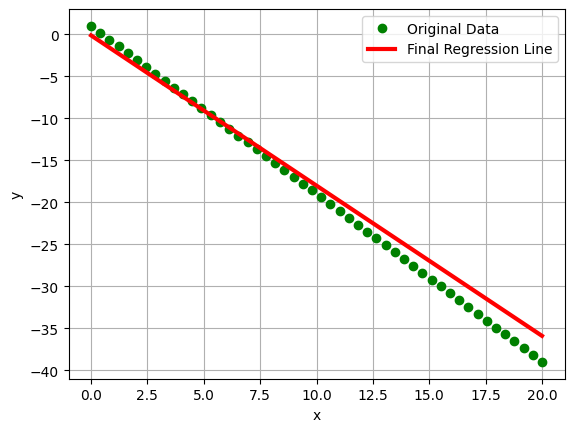

In [14]:
plt.plot(x, y, 'o', label='Original Data',color='green')
plt.plot(x, final_line_y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line        
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [15]:
report,losses,theta_0_history,theta_1_history = gradient_descent(x, y,iterations=500, alpha=0.001)

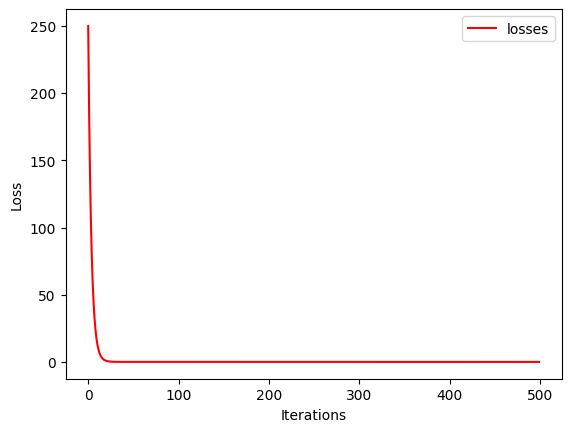

In [16]:
# losses with iterations    
plt.plot( losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

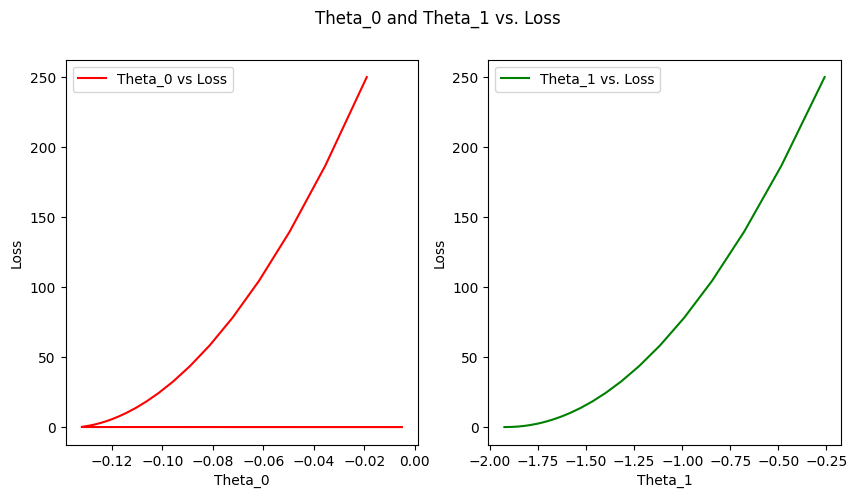

In [17]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

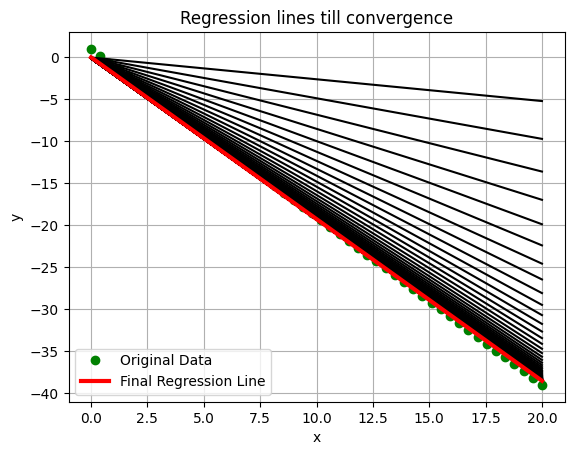

In [18]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

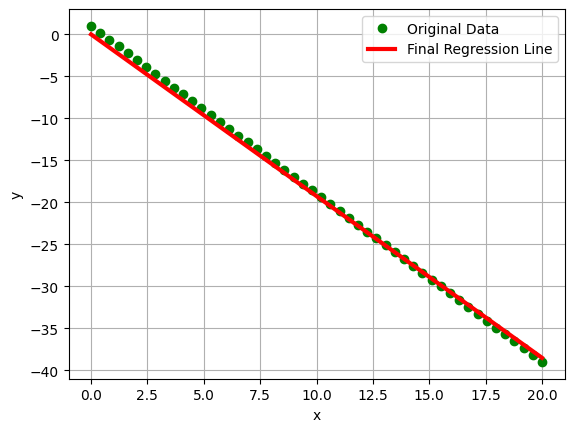

In [19]:
final_line_y_pred = report[-1]['Hypothesis']    

plt.plot(x, y, 'o', label='Original Data',color='green')
plt.plot(x, final_line_y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line        
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [54]:
a = -2     # slope
b = 1      # intercept

x = np.linspace(0,20,50)
print(f"x values : " , x)
print("*"*80)
y = a*x + b 
print(f"y values : " , y)

x values :  [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
********************************************************************************
y values :  [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.1428

In [36]:
def mini_batch_gradient_descent(X, y, alpha=0.0001, epochs=100, convergence_rate=0.001, batch_size=20):

    np.random.seed(42)  
    m = len(X)  
    theta_0 = 0  
    theta_1 = 0  
    report = []   
    losses = []  
    theta_0_history = []  
    theta_1_history = []  

    for i in range(epochs):

        epoch_report = []  
        number_of_batches = math.ceil(len(X) / batch_size)  
        for j in range(number_of_batches):
            start = j * batch_size
            end = start + batch_size

            x_batch = X[start:end]  
            y_batch = y[start:end]  

            y_predicted = theta_0 + (theta_1 * x_batch)  
            cost_fun = (1 / (2 * batch_size)) * np.sum((y_predicted - y_batch) ** 2)  
            losses.append(cost_fun)
            
            gradient_theta_0 = (1 / batch_size) * np.sum(y_predicted - y_batch)
            gradient_theta_1 = (1 / batch_size) * np.sum((y_predicted - y_batch) * x_batch)
            
            theta_0 = theta_0 - alpha * gradient_theta_0
            theta_1 = theta_1 - alpha * gradient_theta_1

            theta_0_history.append(theta_0)
            theta_1_history.append(theta_1)
            
            epoch_report.append({
                "Iteration": j + 1,
                "Theta_0": theta_0,
                "Theta_1": theta_1,
                "Loss": cost_fun,
                "Gradient_Theta_0": gradient_theta_0,
                "Gradient_Theta_1": gradient_theta_1,
                "Hypothesis": y_predicted
            })
        
        report.append({
            "Epoch": i + 1,
            "Iterations": epoch_report
        })
        
        if abs(gradient_theta_0) < convergence_rate and abs(gradient_theta_1) < convergence_rate:
            print(f"Converged at epoch {i + 1}")
            break
    
    return report, losses, theta_0_history, theta_1_history


In [38]:
report,losses,theta_0_history,theta_1_history  = mini_batch_gradient_descent(x, y, alpha=0.0001, epochs=1000, convergence_rate=0.001,batch_size=8)

In [40]:
report

[{'Epoch': 1,
  'Iterations': [{'Iteration': 1,
    'Theta_0': np.float64(-0.00018571428571428572),
    'Theta_1': np.float64(-0.00044023323615160364),
    'Loss': np.float64(3.4737609329446064),
    'Gradient_Theta_0': np.float64(1.857142857142857),
    'Gradient_Theta_1': np.float64(4.402332361516036),
    'Hypothesis': array([0., 0., 0., 0., 0., 0., 0., 0.])},
   {'Iteration': 2,
    'Theta_0': np.float64(-0.0010242645843993575),
    'Theta_1': np.float64(-0.0045511742678888654),
    'Loss': np.float64(36.90683130572833),
    'Gradient_Theta_0': np.float64(8.385502986850717),
    'Gradient_Theta_1': np.float64(41.10941031737262),
    'Hypothesis': array([-0.00162321, -0.0018029 , -0.00198258, -0.00216227, -0.00234196,
           -0.00252165, -0.00270133, -0.00288102])},
   {'Iteration': 3,
    'Theta_0': np.float64(-0.002512376529441986),
    'Theta_1': np.float64(-0.01656985961698023),
    'Loss': np.float64(112.46517700641269),
    'Gradient_Theta_0': np.float64(14.881119450426283

In [41]:
# To access the final values of theta_0 and theta_1
print(f"Final theta_0 value: {theta_0_history[-1]}")
print(f"Final theta_1 value: {theta_1_history[-1]}")


Final theta_0 value: 0.026003848275947754
Final theta_1 value: -1.9282482348974495


In [42]:
y_predicted =  report[-1]
y_predicted

{'Epoch': 1000,
 'Iterations': [{'Iteration': 1,
   'Theta_0': np.float64(0.025934748051972385),
   'Theta_1': np.float64(-1.9281184809737884),
   'Loss': np.float64(0.382124606962566),
   'Gradient_Theta_0': np.float64(-0.8716334486735505),
   'Gradient_Theta_1': np.float64(-1.1824239267054737),
   'Hypothesis': array([ 0.02584758, -0.76118781, -1.54822321, -2.33525861, -3.122294  ,
          -3.9093294 , -4.6963648 , -5.4834002 ])},
  {'Iteration': 2,
   'Theta_0': np.float64(0.02599841427231815),
   'Theta_1': np.float64(-1.9278259265446749),
   'Loss': np.float64(0.2049289809957942),
   'Gradient_Theta_0': np.float64(-0.6366622034576465),
   'Gradient_Theta_1': np.float64(-2.9255442911339573),
   'Hypothesis': array([ -6.26996233,  -7.05694947,  -7.8439366 ,  -8.63092374,
           -9.41791087, -10.20489801, -10.99188514, -11.77887228])},
  {'Iteration': 3,
   'Theta_0': np.float64(0.02603836976018158),
   'Theta_1': np.float64(-1.9275142260791835),
   'Loss': np.float64(0.0821000

In [43]:
# to accsess Hypothesis from all iterations at the last epoch
y_pred = []
for i in range(len(y_predicted['Iterations'])):
    x = y_predicted['Iterations'][i]['Hypothesis'].flatten()
    y_pred.append(x)

y_pred = np.concatenate(y_pred).reshape(-1, 1)
y_pred = y_pred.flatten()
y_pred

array([ 2.58475847e-02, -7.61187813e-01, -1.54822321e+00, -2.33525861e+00,
       -3.12229400e+00, -3.90932940e+00, -4.69636480e+00, -5.48340020e+00,
       -6.26996233e+00, -7.05694947e+00, -7.84393660e+00, -8.63092374e+00,
       -9.41791087e+00, -1.02048980e+01, -1.09918851e+01, -1.17788723e+01,
       -1.25638852e+01, -1.33507529e+01, -1.41376206e+01, -1.49244884e+01,
       -1.57113561e+01, -1.64982238e+01, -1.72850915e+01, -1.80719593e+01,
       -1.88557336e+01, -1.96424741e+01, -2.04292146e+01, -2.12159551e+01,
       -2.20026956e+01, -2.27894361e+01, -2.35761766e+01, -2.43629171e+01,
       -2.51473737e+01, -2.59340433e+01, -2.67207129e+01, -2.75073825e+01,
       -2.82940522e+01, -2.90807218e+01, -2.98673914e+01, -3.06540610e+01,
       -3.14427082e+01, -3.22294271e+01, -3.30161460e+01, -3.38028648e+01,
       -3.45895837e+01, -3.53763026e+01, -3.61630214e+01, -3.69497403e+01,
       -3.77475368e+01, -3.85344858e+01])

In [44]:
r_2 = r2_score(y, y_pred)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9982319615846128 so we have accuracy of 99.82 %


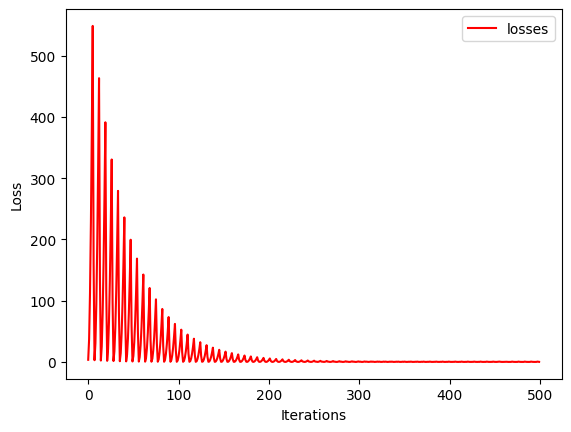

In [47]:
plt.plot(range(500) ,losses[:500],label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

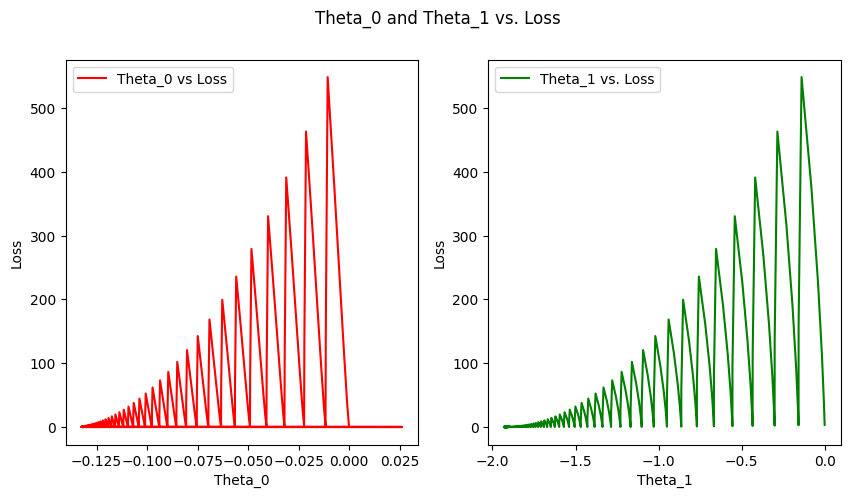

In [48]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

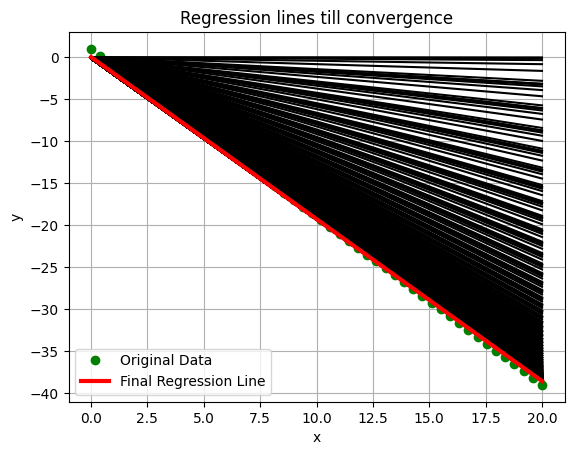

In [56]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


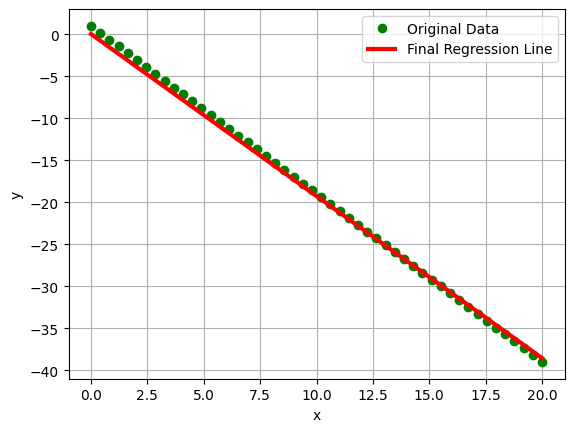

In [57]:
plt.plot(x, y, 'o', label='Original Data',color='green')
plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')              # for the last regression line        
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [58]:
report,losses,theta_0_history,theta_1_history  = mini_batch_gradient_descent(x, y, alpha=0.001, epochs=1000, convergence_rate=0.001,batch_size=20)

In [59]:
report

[{'Epoch': 1,
  'Iterations': [{'Iteration': 1,
    'Theta_0': np.float64(-0.0067551020408163276),
    'Theta_1': np.float64(-0.0372719700124948),
    'Loss': np.float64(33.894418992086635),
    'Gradient_Theta_0': np.float64(6.755102040816327),
    'Gradient_Theta_1': np.float64(37.2719700124948),
    'Hypothesis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.])},
   {'Iteration': 2,
    'Theta_0': np.float64(-0.029381194646788334),
    'Theta_1': np.float64(-0.32058084966159284),
    'Loss': np.float64(266.63967253066556),
    'Gradient_Theta_0': np.float64(22.626092605972005),
    'Gradient_Theta_1': np.float64(283.30887964909806),
    'Hypothesis': array([-0.31101608, -0.32622913, -0.34144218, -0.35665523, -0.37186828,
           -0.38708133, -0.40229438, -0.41750742, -0.43272047, -0.44793352,
           -0.46314657, -0.47835962, -0.49357267, -0.50878572, -0.52399877,
           -0.53921182, -0.55442487, -0.56963791, -0.58485096, -

In [60]:
y_predicted =  report[-1]
y_predicted

{'Epoch': 1000,
 'Iterations': [{'Iteration': 1,
   'Theta_0': np.float64(0.40134525469812826),
   'Theta_1': np.float64(-1.95564190782645),
   'Loss': np.float64(0.0987033950911586),
   'Gradient_Theta_0': np.float64(-0.43267017511424044),
   'Gradient_Theta_1': np.float64(-1.4399617642104794),
   'Hypothesis': array([  0.40091258,  -0.39789634,  -1.19670527,  -1.99551419,
           -2.79432312,  -3.59313205,  -4.39194097,  -5.1907499 ,
           -5.98955883,  -6.78836775,  -7.58717668,  -8.38598561,
           -9.18479453,  -9.98360346, -10.78241238, -11.58122131,
          -12.38003024, -13.17883916, -13.97764809, -14.77645702])},
  {'Iteration': 2,
   'Theta_0': np.float64(0.4014098018029731),
   'Theta_1': np.float64(-1.955110423371991),
   'Loss': np.float64(0.0075328970955793224),
   'Gradient_Theta_0': np.float64(-0.06454710484483961),
   'Gradient_Theta_1': np.float64(-0.5314844544590157),
   'Hypothesis': array([-15.56307848, -16.36129967, -17.15952086, -17.95774204,
      

In [61]:
# to accsess Hypothesis from all iterations at the last epoch
y_pred = []
for i in range(len(y_predicted['Iterations'])):
    x = y_predicted['Iterations'][i]['Hypothesis'].flatten()
    y_pred.append(x)

y_pred = np.concatenate(y_pred).reshape(-1, 1)
y_pred = y_pred.flatten()
y_pred

array([  0.40091258,  -0.39789634,  -1.19670527,  -1.99551419,
        -2.79432312,  -3.59313205,  -4.39194097,  -5.1907499 ,
        -5.98955883,  -6.78836775,  -7.58717668,  -8.38598561,
        -9.18479453,  -9.98360346, -10.78241238, -11.58122131,
       -12.38003024, -13.17883916, -13.97764809, -14.77645702,
       -15.56307848, -16.36129967, -17.15952086, -17.95774204,
       -18.75596323, -19.55418442, -20.3524056 , -21.15062679,
       -21.94884798, -22.74706916, -23.54529035, -24.34351154,
       -25.14173273, -25.93995391, -26.7381751 , -27.53639629,
       -28.33461747, -29.13283866, -29.93105985, -30.72928103,
       -31.51876038, -32.31676463, -33.11476888, -33.91277314,
       -34.71077739, -35.50878165, -36.3067859 , -37.10479016,
       -37.90279441, -38.70079867])

In [62]:
r_2 = r2_score(y, y_pred)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9993158796150221 so we have accuracy of 99.93 %


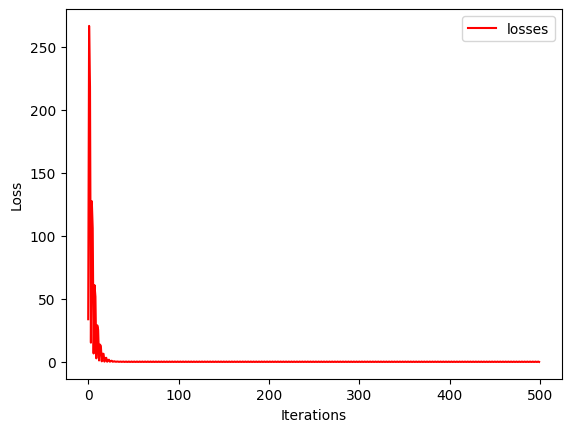

In [63]:
plt.plot(range(500) ,losses[:500],label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

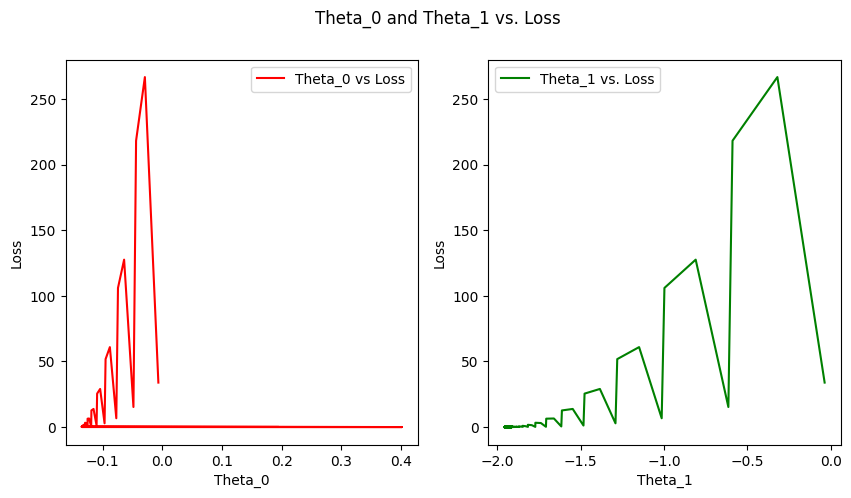

In [64]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

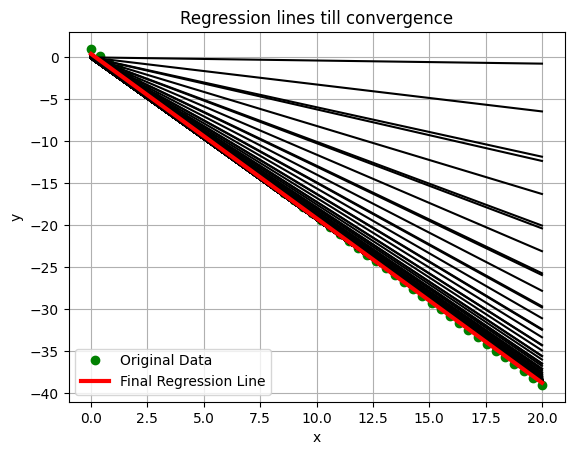

In [67]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


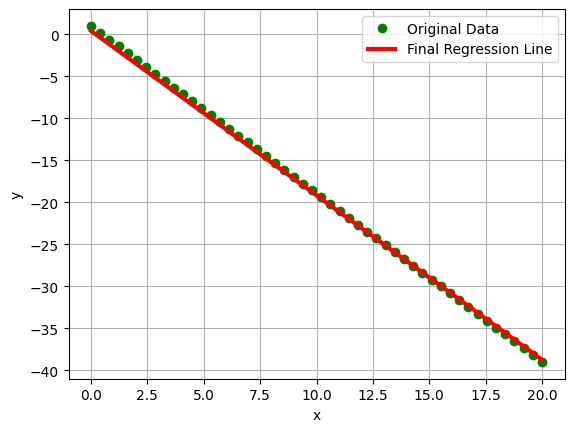

In [68]:
plt.plot(x, y, 'o', label='Original Data',color='green')
plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')              # for the last regression line        
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [ ]:
def gradient_descent(X, y, alpha=0.01, iterations=1000, convergence_rate=0.001):
    m = len(y)
    theta_0 = 0  
    theta_1 = 0  
    report = []
    losses = [] 
    theta_0_history = []
    theta_1_history = []

    for i in range(iterations): 
        y_predicted = theta_0 + (theta_1 * X)  
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)  
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        theta_0 = theta_0 - alpha * gradient_theta_0  
        theta_1 = theta_1 - alpha * gradient_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted
        })
        
        if abs(gradient_theta_0) < convergence_rate and abs(gradient_theta_1) < convergence_rate:
            print(f"Converged at iteration {i+1}")
            break
    
    return report,losses,theta_0_history,theta_1_history


In [100]:
def stochastic_gradient_descent(X, y, alpha=0.01, iterations=1000, convergence_rate=0.001):
    m = len(y)
    theta_0 = 0  
    theta_1 = 0  
    report = []
    losses = [] 
    all_losses = []
    theta_0_history = []
    theta_1_history = []

    for i in range(iterations): 
        total_loss = 0 

        for j in range(m):
        
            x_j = X[j]
            y_j = y[j]

            y_predicted = theta_0 + (theta_1 * x_j)  

            cost_fun = (1 / 2) * ((y_predicted - y_j) ** 2)
            total_loss += cost_fun
            all_losses.append(cost_fun)


            gradient_theta_0 = (y_predicted - y_j)
            gradient_theta_1 = (y_predicted - y_j) * x_j

            theta_0 = theta_0 - alpha * gradient_theta_0  
            theta_1 = theta_1 - alpha * gradient_theta_1
            theta_0_history.append(theta_0)
            theta_1_history.append(theta_1)

        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": total_loss / m,
        })
        
        if abs(gradient_theta_0) < convergence_rate and abs(gradient_theta_1) < convergence_rate:
            print(f"Converged at iteration {i+1}")
            break
    
    return report, losses, theta_0_history, theta_1_history, y_pred, all_losses


In [101]:
report, losses, theta_0_history, theta_1_history,y_pred, all_losses = stochastic_gradient_descent(x, y, alpha=0.01, iterations=1000, convergence_rate=0.001)

Converged at iteration 77


In [102]:
report

[{'Iteration': 1,
  'Theta_0': np.float64(-0.46222921736688133),
  'Theta_1': np.float64(-1.9280081405574716),
  'Loss': np.float64(1.5580364282353276)},
 {'Iteration': 2,
  'Theta_0': np.float64(-0.3683355936969456),
  'Theta_1': np.float64(-1.9326307528460844),
  'Loss': np.float64(0.13670497114385108)},
 {'Iteration': 3,
  'Theta_0': np.float64(-0.28047117668976573),
  'Theta_1': np.float64(-1.9369567088933404),
  'Loss': np.float64(0.11971221233754434)},
 {'Iteration': 4,
  'Theta_0': np.float64(-0.19824876432607416),
  'Theta_1': np.float64(-1.941004883955824),
  'Loss': np.float64(0.10483174681131426)},
 {'Iteration': 5,
  'Theta_0': np.float64(-0.12130606869098855),
  'Theta_1': np.float64(-1.9447931150626525),
  'Loss': np.float64(0.09180095267510632)},
 {'Iteration': 6,
  'Theta_0': np.float64(-0.04930406533279681),
  'Theta_1': np.float64(-1.9483380939286274),
  'Loss': np.float64(0.08038991210121249)},
 {'Iteration': 7,
  'Theta_0': np.float64(0.018074500560772592),
  'Theta

In [103]:
final_theta_0 = theta_0_history[-1]
final_theta_1 = theta_1_history[-1]

print(f"Final theta_0 value: {final_theta_0}")
print(f"Final theta_1 value: {final_theta_1}")

Final theta_0 value: 0.9905706591190014
Final theta_1 value: -1.9995357516003354


In [104]:
y_pred = final_theta_0 + final_theta_1 * x
y_pred

array([  0.99057066,   0.17443362,  -0.64170342,  -1.45784047,
        -2.27397751,  -3.09011455,  -3.90625159,  -4.72238863,
        -5.53852567,  -6.35466271,  -7.17079976,  -7.9869368 ,
        -8.80307384,  -9.61921088, -10.43534792, -11.25148496,
       -12.067622  , -12.88375905, -13.69989609, -14.51603313,
       -15.33217017, -16.14830721, -16.96444425, -17.78058129,
       -18.59671834, -19.41285538, -20.22899242, -21.04512946,
       -21.8612665 , -22.67740354, -23.49354058, -24.30967763,
       -25.12581467, -25.94195171, -26.75808875, -27.57422579,
       -28.39036283, -29.20649988, -30.02263692, -30.83877396,
       -31.654911  , -32.47104804, -33.28718508, -34.10332212,
       -34.91945917, -35.73559621, -36.55173325, -37.36787029,
       -38.18400733, -39.00014437])

In [105]:
r2_score(y, y_pred)

0.9999997810027761

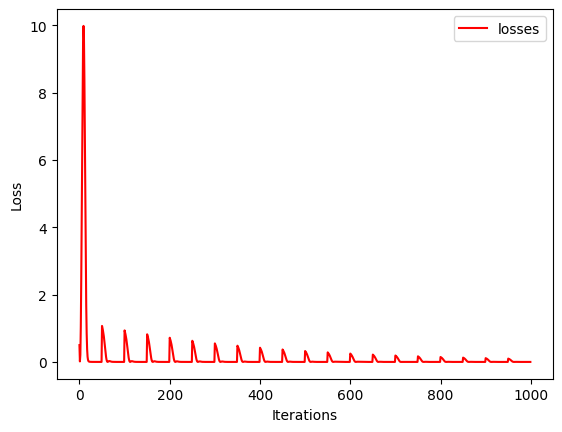

In [106]:
plt.plot(range(1000),all_losses[:1000],label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

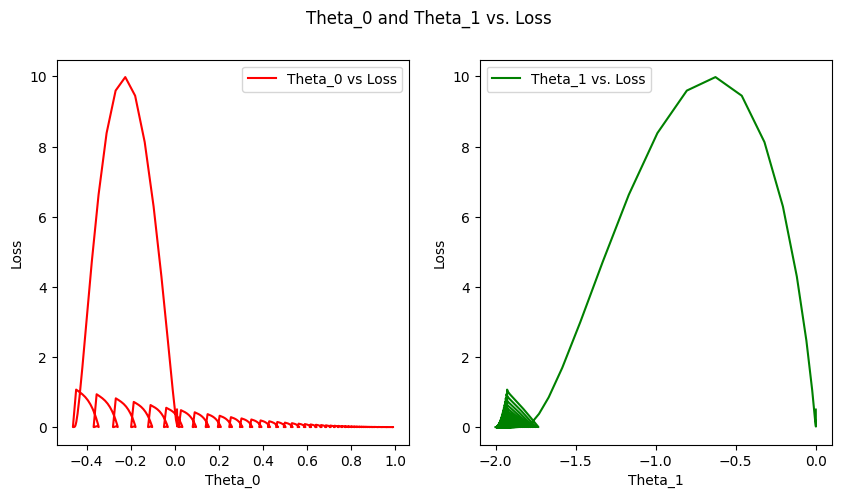

In [107]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, all_losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, all_losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

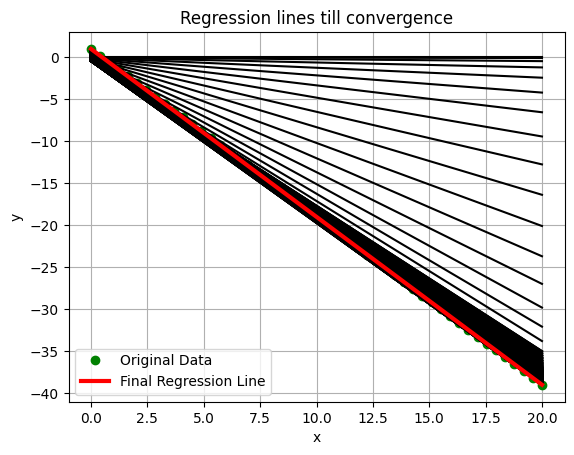

In [114]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    # print(y_pred)
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


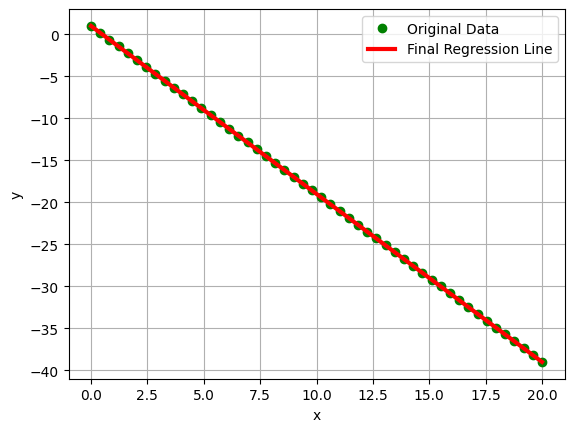

In [115]:
plt.plot(x, y, 'o', label='Original Data',color='green')
plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')              # for the last regression line        
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

<b>Comparison Between Stochastic Gradient Descent (SGD), Batch Gradient Descent (BGD), and Mini-Batch Gradient Descent (MBGD) </b>

Batch Gradient Descent 

Computes the gradient over the entire dataset before updating weights.
Ensures a smooth and stable convergence.
Can be computationally expensive for large datasets.

More stable updates smooth 

Slow on large datasets (every iteration requires computing the gradient over all data).
________________________________________________________________________________________________

 Stochastic Gradient Descent

Updates weights after each individual data point.
Faster than BGD but high variance
Works well for large datasets and real-time learning.

Can handle real-time learning.
Helps escape local minima due to random updates.

Noisy convergence, may oscillate around the minimum.
_________________________________________________________________________

 Mini-Batch Gradient Descent

Updates weights after a small batch of data 
Balances between BGD and SGD 

Faster than BGD, more stable than SGD.
Works well for large datasets.
Can be parallelized efficiently.

Requires choosing an optimal batch size.
Still has some noise, though much less than SGD.